In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets.values 

# Reshape the target variable y
y = np.ravel(y)

# Change class values into 1s and 0s for binary classification
# Convert M = 1, B = 0
y_encoded = np.where(y == 'M', 1, 0)
y_encoded

# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

# Split the dataset into training and testing sets
# 80% of data for training
# 20% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize Support Vector Classifier
svm = SVC(probability=True)

# Fit the model on the training data
svm.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = svm.predict_proba(X_test)

# Predict class labels for the test set
y_pred = svm.predict(X_test)

# Compare predicted labels with ground truth
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of diagnosis prediction: {accuracy * 100:.2f}%")

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

Accuracy: 94.74%
Number of features: 30


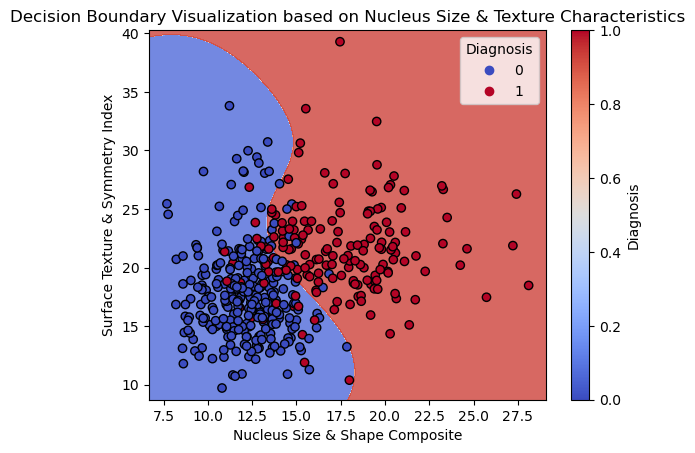

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets.values

# Reshape the target variable y
y = np.ravel(y)

# Change class values into 1s and 0s for binary classification
y_encoded = np.where(y == 'M', 1, 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize Support Vector Classifier
svm = SVC(probability=True)

# Fit the model on the training data
svm.fit(X_train, y_train)

# Predict class labels for the test set
y_pred = svm.predict(X_test)

# Compare predicted labels with ground truth
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Check the number of features in the dataset
num_features = X_train.shape[1]
print(f"Number of features: {num_features}")

# Ensure we have more than two features before visualization
if num_features >= 2:
    # Convert X_train and X_test to numpy arrays for slicing
    X_train = np.array(X_train)
    X_test = np.array(X_test)

    # Ensure we have more than two features before visualization
    if num_features >= 2:
        # Select the first two features for visualization
        X_train_subset = X_train[:, :2]
        X_test_subset = X_test[:, :2]

        # Fit the model on the reduced feature space
        svm.fit(X_train_subset, y_train)

        # Create a meshgrid to plot decision boundary
        h = 0.02  # step size in the mesh
        x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
        y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # Plot decision boundary
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot data points
        scatter = plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
        plt.xlabel('Nucleus Size & Shape Composite')
        plt.ylabel('Surface Texture & Symmetry Index')
        plt.title('Decision Boundary Visualization based on Nucleus Size & Texture Characteristics')

        # Adding appropriate tags
        plt.legend(*scatter.legend_elements(), title='Diagnosis')
        plt.colorbar(scatter, label='Diagnosis')
        plt.show()